In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Insurance%20Premium.csv')

In [ ]:
df.head()

,ID,Age,Gender,BMI,Children,Smoker,Region,Premium
0,1,19,female,27.900,0,yes,south,16885
1,2,18,male,33.770,1,no,east,1726
2,3,28,male,33.000,3,no,east,4449
3,4,33,male,22.705,0,no,west,21984
4,5,32,male,28.880,0,no,west,3867


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Children  1338 non-null   int64  
 5   Smoker    1338 non-null   object 
 6   Region    1338 non-null   object 
 7   Premium   1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [ ]:
df.describe()

,ID,Age,BMI,Children,Premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.414798
std,386.391641,14.049960,6.098187,1.205493,12110.012882
min,1.000000,18.000000,15.960000,0.000000,1122.000000
25%,335.250000,27.000000,26.296250,0.000000,4740.000000
50%,669.500000,39.000000,30.400000,1.000000,9382.000000
75%,1003.750000,51.000000,34.693750,2.000000,16640.000000
max,1338.000000,64.000000,53.130000,5.000000,63770.000000


In [ ]:
df[['Gender']].value_counts()

,count
Gender,
male,676
female,662


In [ ]:
df[['Smoker']].value_counts()

,count
Smoker,
no,1064
yes,274


In [ ]:
df[['Region']].value_counts()

,count
Region,
east,364
south,325
west,325
north,324


In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region',
       'Premium'],
      dtype='object')

In [ ]:
df.shape

(1338, 8)

In [ ]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)

<ipython-input-16-bbba67831fce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0,'female':1}},inplace=True)


In [ ]:
df.replace({'Smoker':{'no':0,'yes':1}},inplace=True)

<ipython-input-17-91ae080eb1e4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Smoker':{'no':0,'yes':1}},inplace=True)


In [ ]:
df.replace({'Region':{'north':0,'east':1,'south':2,'west':3}},inplace=True)

<ipython-input-18-d5d1ad9b539c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Region':{'north':0,'east':1,'south':2,'west':3}},inplace=True)


In [ ]:
y = df['Premium']

In [ ]:
y.shape

(1338,)

In [ ]:
y

,Premium
0,16885
1,1726
2,4449
3,21984
4,3867
...,...
1333,10601
1334,2206
1335,1630
1336,2008


In [ ]:
X = df[['Age','Gender','BMI','Children','Smoker','Region']]

In [ ]:
X = df.drop(['ID', 'Premium'], axis=1)

In [ ]:
X.shape

(1338, 6)

In [ ]:
X

,Age,Gender,BMI,Children,Smoker,Region
0,19,1,27.900,0,1,2
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,2


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_std = df[['Age', 'BMI']]

In [ ]:
X_std = sc.fit_transform(X_std)

In [ ]:
X_std

array([[-1.43876426, -0.45332   ],
       [-1.50996545,  0.5096211 ],
       [-0.79795355,  0.38330685],
       ...,
       [-1.50996545,  1.0148781 ],
       [-1.29636188, -0.79781341],
       [ 1.55168573, -0.26138796]])

In [ ]:
X[['Age', 'BMI']] = pd.DataFrame(X_std, columns=['Age', 'BMI'])

In [ ]:
X

,Age,Gender,BMI,Children,Smoker,Region
0,19,1,27.900,0,1,2
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=2529)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=2529)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
y_pred

array([13371.68      ,  4288.26      ,  9119.29      ,  4040.25      ,
        5329.16      , 13991.25      , 14199.77      ,  3515.28      ,
       10323.48      ,  3450.04      , 33355.04      ,  1974.65      ,
       14429.98      ,  8164.07      , 25308.29      , 28548.37      ,
        8118.45      , 22024.29      , 13110.53      , 11168.45      ,
        7699.44      ,  7280.67      ,  4082.55533333,  6708.6       ,
        5860.69      , 19385.02      , 17158.38      , 31660.63      ,
       14601.78      , 39947.41      , 47052.06      ,  7383.92      ,
        5416.43      ,  4667.76      , 40909.74      , 10357.81      ,
       11359.43      , 35129.46      , 16852.98      ,  5416.33      ,
        5281.86      , 11274.92      , 46333.01      , 11521.96      ,
       15874.27      , 10800.32      , 16575.95      ,  9388.2       ,
        2149.41      , 48153.35      ,  1162.33      , 45791.92      ,
        3617.13      ,  4424.78      ,  5044.08      ,  9605.9       ,
      

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

26084905.737036493

In [ ]:
mean_absolute_error(y_test,y_pred)

2917.1979813432836

In [ ]:
r2_score(y_test,y_pred)

0.8302249136941074

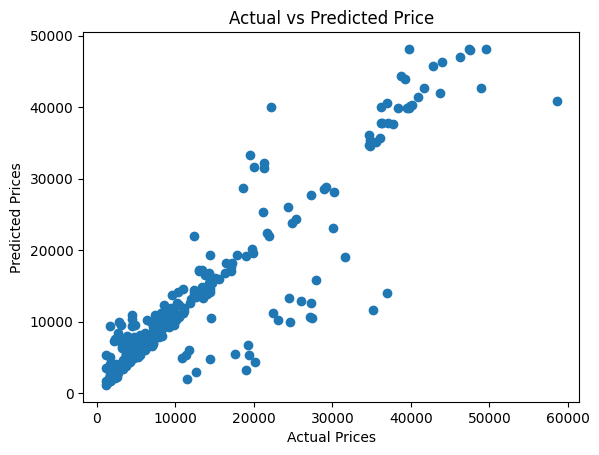

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Price")
plt.show()

In [ ]:
X_new = np.array([-1.22516069, 0, 1.44959597, 0, 0, 2])

In [ ]:
X_new = X_new.reshape(-1,6)

In [ ]:
X_new.shape

(1, 6)

In [ ]:
y_pred_new = rfr.predict(X_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_new

array([3876.1])